IMPORTACIONES

In [14]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
dataset_path = 'dataset'

In [16]:
train_data = {}  # Diccionario para almacenar las imágenes de entrenamiento y sus etiquetas
test_data = {}  # Diccionario para almacenar las imágenes de prueba y sus etiquetas

In [17]:
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for data_split in os.listdir(class_dir):
            split_dir = os.path.join(class_dir, data_split)
            if os.path.isdir(split_dir):
                data = train_data if data_split == 'train' else test_data  # Selecciona el diccionario correspondiente
                for filename in os.listdir(split_dir):
                    if filename.endswith('.jpg'):
                        image_path = os.path.join(split_dir, filename)
                        image = Image.open(image_path)
                        image = image.resize((224, 224))  # Redimensiona la imagen a un tamaño deseado
                        image_array = np.array(image)  # Convierte la imagen a una matriz NumPy
                        image_array = image_array / 255.0  # Normaliza los valores de píxeles entre 0 y 1
                        if class_name not in data:
                            data[class_name] = []  # Inicializa una lista vacía para la clase si no existe aún
                        data[class_name].append(image_array)

# Prepara los datos de entrada y etiquetas de entrenamiento

In [18]:
X_train = []  # Lista para almacenar las imágenes de entrenamiento
y_train = []  # Lista para almacenar las etiquetas de entrenamiento

In [19]:
class_to_num = {}  # Diccionario para mapear las clases a valores numéricos

for class_index, (class_name, images) in enumerate(train_data.items()):
    class_to_num[class_name] = class_index  # Asigna un valor numérico a cada clase
    for image_array in images:
        X_train.append(image_array)
        y_train.append(class_index)  # Usa el valor numérico en lugar del nombre de la clase

# Convierte las listas de entrenamiento en matrices NumPy

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# Convierte las etiquetas de entrenamiento a codificación one-hot

In [21]:
num_classes = len(class_to_num)  # Número total de clases en el dataset
y_train = tf.one_hot(y_train, num_classes)

# Prepara los datos de entrada y etiquetas de prueba

In [22]:
X_test = []  # Lista para almacenar las imágenes de prueba
y_test = []  # Lista para almacenar las etiquetas de prueba

In [23]:
for class_index, (class_name, images) in enumerate(test_data.items()):
    for image_array in images:
        X_test.append(image_array)
        y_test.append(class_index)  # Usa el valor numérico en lugar del nombre de la clase

# Convierte las listas de prueba en matrices NumPy

In [24]:
X_test = np.array(X_test)
y_test = np.array(y_test)

# Convierte las etiquetas de prueba a codificación one-hot

In [25]:
y_test = tf.one_hot(y_test, num_classes)

# Define el modelo de clasificación

In [26]:
model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Especifica la forma de entrada de la imagen
    layers.Conv2D(16, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # num_classes es el número total de clases en tu dataset
])

# Compila el modelo

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrena el modelo

In [28]:
model.fit(X_train, y_train, batch_size=32, epochs=40)  # Ajusta los valores de batch_size y epochs según sea necesario

Epoch 1/40
18/18 [==============================] - 5s 251ms/step - loss: 5.8654 - accuracy: 0.1751
Epoch 2/40
18/18 [==============================] - 5s 271ms/step - loss: 1.8835 - accuracy: 0.1944
Epoch 3/40
18/18 [==============================] - 5s 270ms/step - loss: 1.4969 - accuracy: 0.4746
Epoch 4/40
18/18 [==============================] - 5s 296ms/step - loss: 1.0779 - accuracy: 0.6357
Epoch 5/40
18/18 [==============================] - 5s 290ms/step - loss: 0.7053 - accuracy: 0.8039
Epoch 6/40
18/18 [==============================] - 5s 295ms/step - loss: 0.4838 - accuracy: 0.8651
Epoch 7/40
18/18 [==============================] - 5s 272ms/step - loss: 0.3133 - accuracy: 0.9142
Epoch 8/40
18/18 [==============================] - 5s 266ms/step - loss: 0.2012 - accuracy: 0.9580
Epoch 9/40
18/18 [==============================] - 5s 263ms/step - loss: 0.1108 - accuracy: 0.9825
Epoch 10/40
18/18 [==============================] - 5s 264ms/step - loss: 0.1026 - accuracy: 0.9755

1/1 [==============================] - 0s 72ms/step


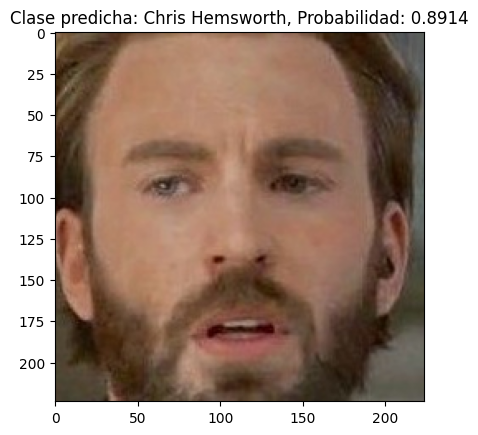

1/1 [==============================] - 0s 18ms/step


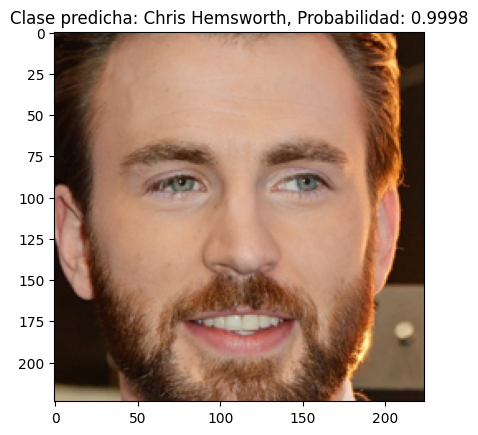

1/1 [==============================] - 0s 19ms/step


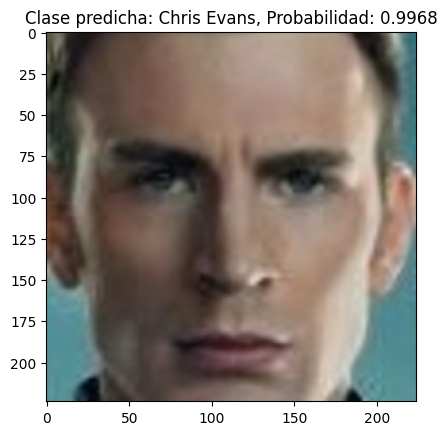

1/1 [==============================] - 0s 19ms/step


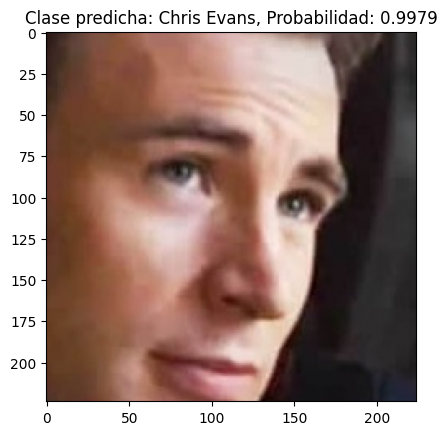

1/1 [==============================] - 0s 18ms/step


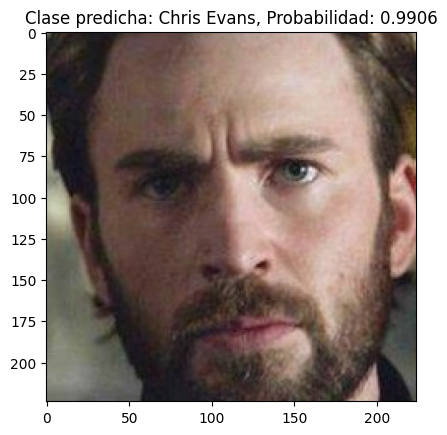

1/1 [==============================] - 0s 22ms/step


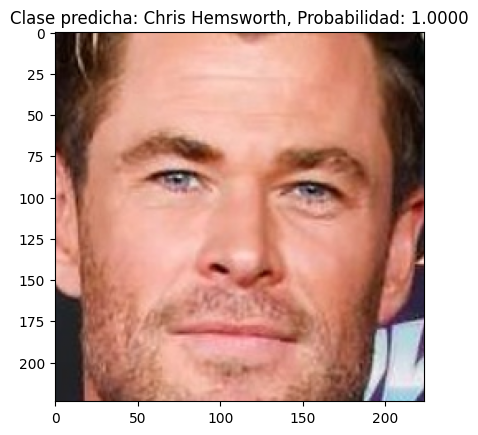

1/1 [==============================] - 0s 19ms/step


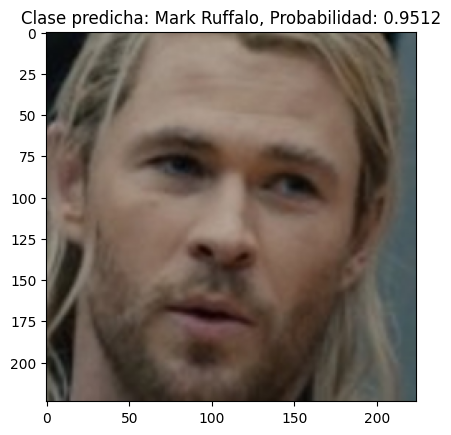

1/1 [==============================] - 0s 19ms/step


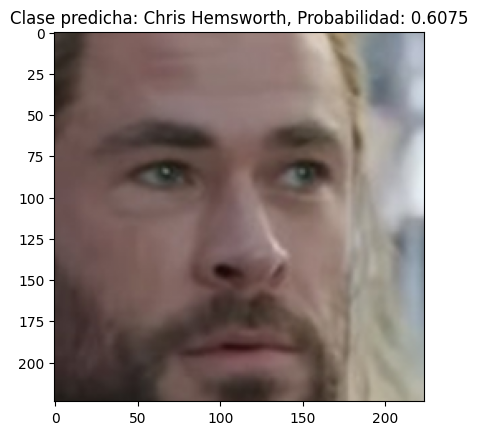

1/1 [==============================] - 0s 23ms/step


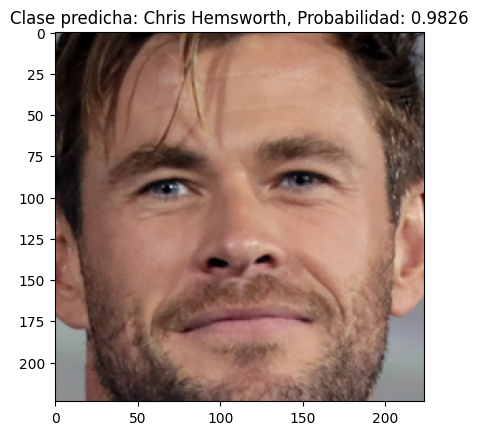

1/1 [==============================] - 0s 18ms/step


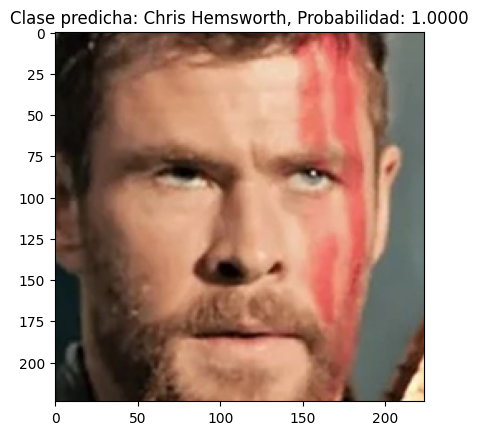

1/1 [==============================] - 0s 20ms/step


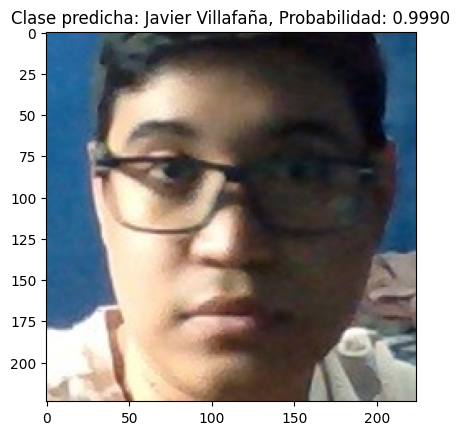

1/1 [==============================] - 0s 20ms/step


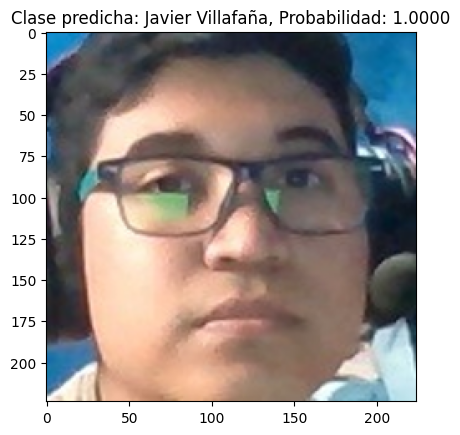

1/1 [==============================] - 0s 18ms/step


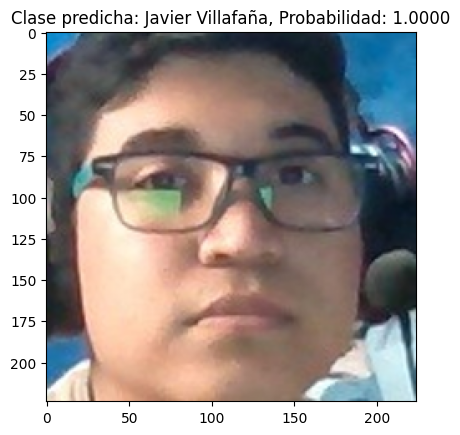

1/1 [==============================] - 0s 24ms/step


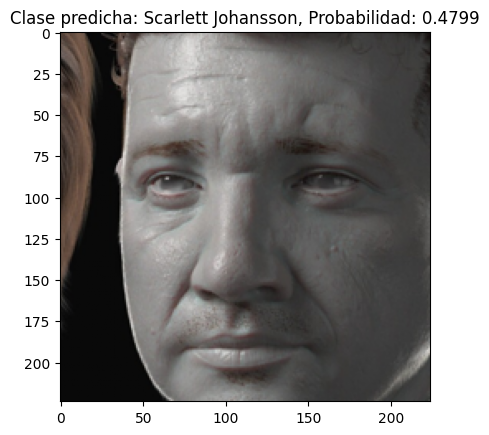

1/1 [==============================] - 0s 21ms/step


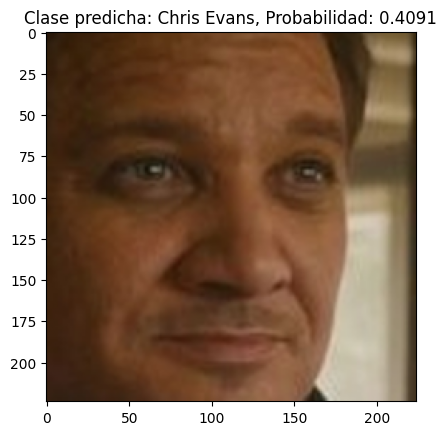

1/1 [==============================] - 0s 20ms/step


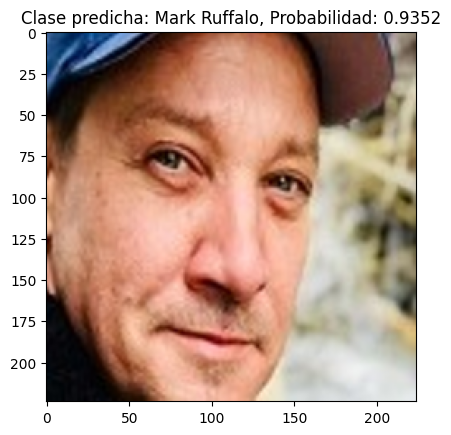

1/1 [==============================] - 0s 23ms/step


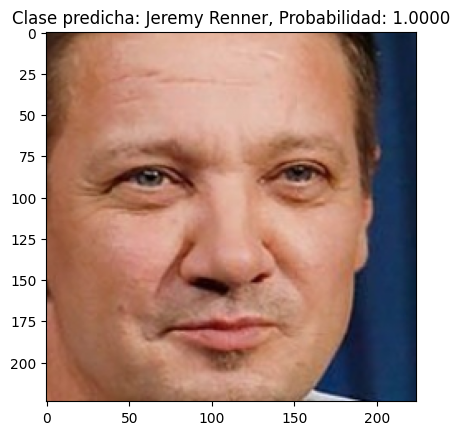

1/1 [==============================] - 0s 20ms/step


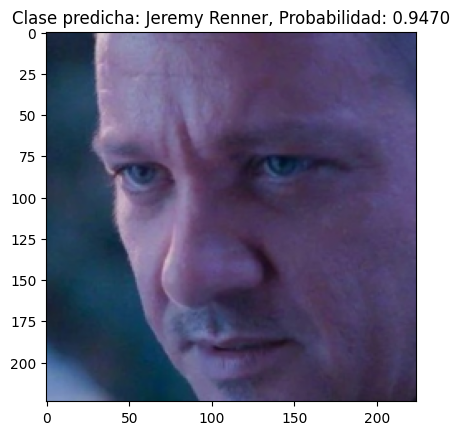

1/1 [==============================] - 0s 28ms/step


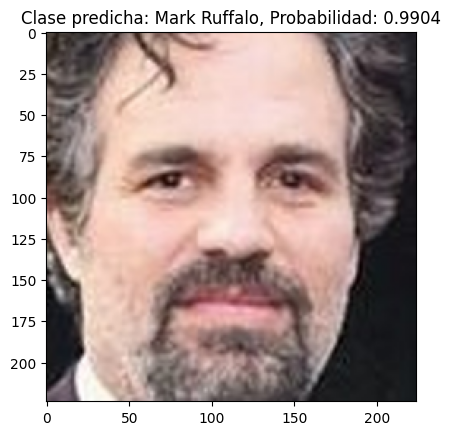

1/1 [==============================] - 0s 19ms/step


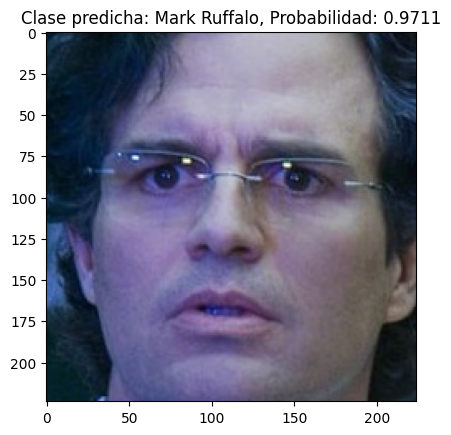

1/1 [==============================] - 0s 19ms/step


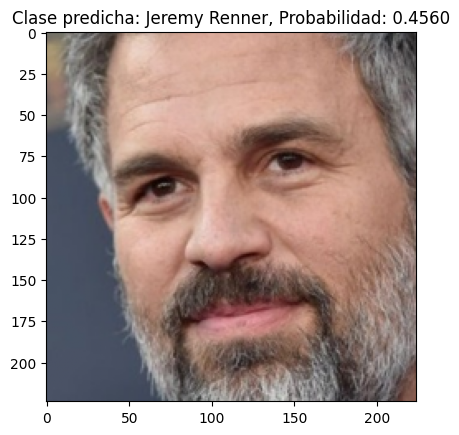

1/1 [==============================] - 0s 19ms/step


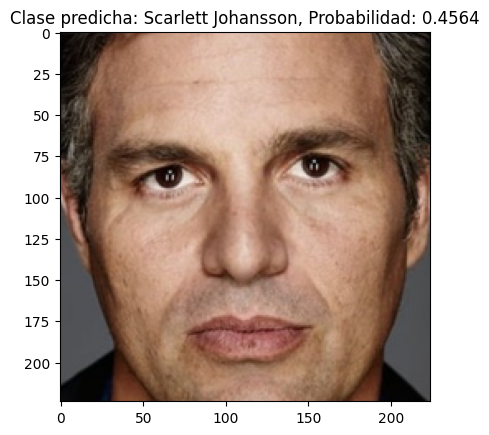

1/1 [==============================] - 0s 30ms/step


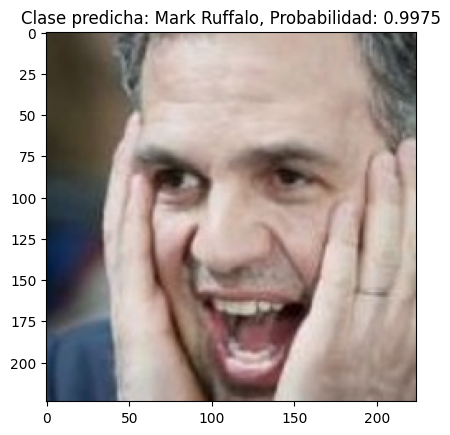

1/1 [==============================] - 0s 27ms/step


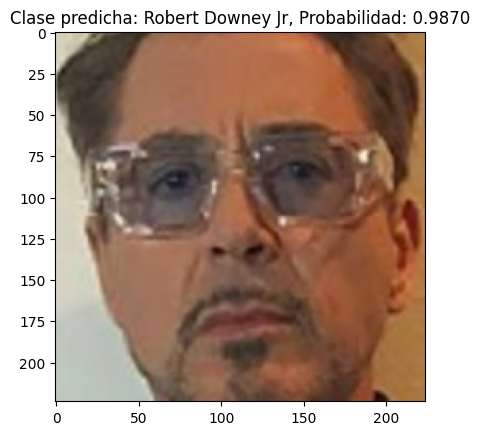

1/1 [==============================] - 0s 21ms/step


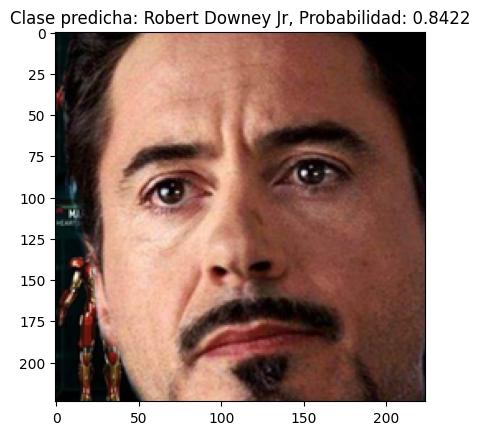

1/1 [==============================] - 0s 20ms/step


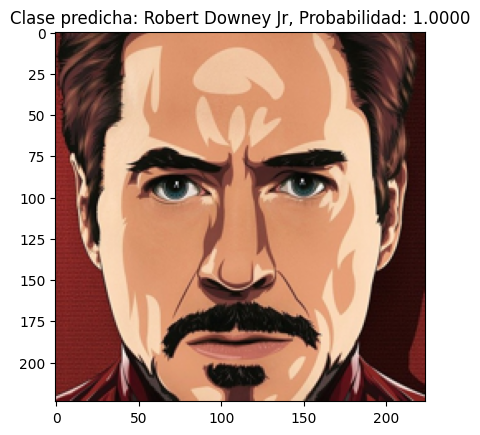

1/1 [==============================] - 0s 20ms/step


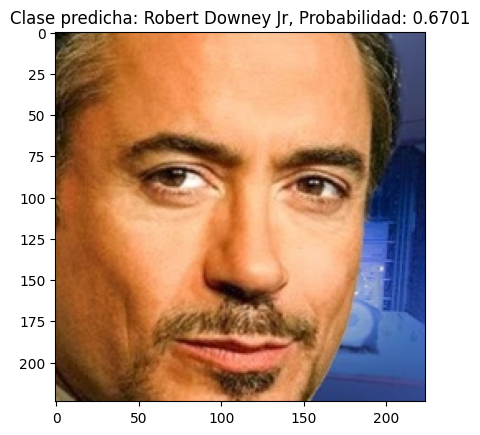

1/1 [==============================] - 0s 25ms/step


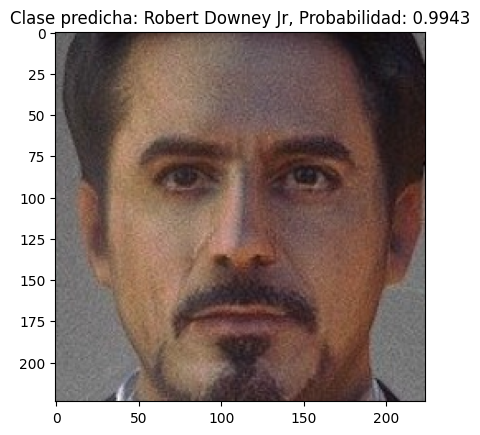

1/1 [==============================] - 0s 20ms/step


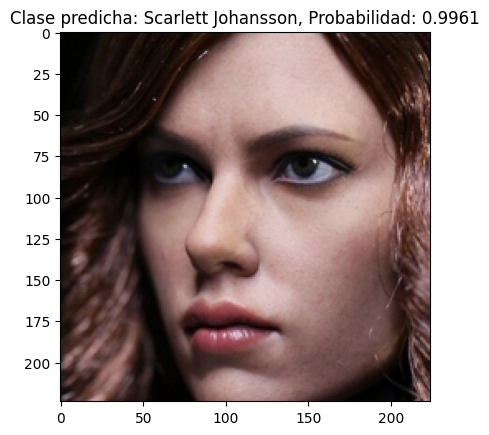

1/1 [==============================] - 0s 20ms/step


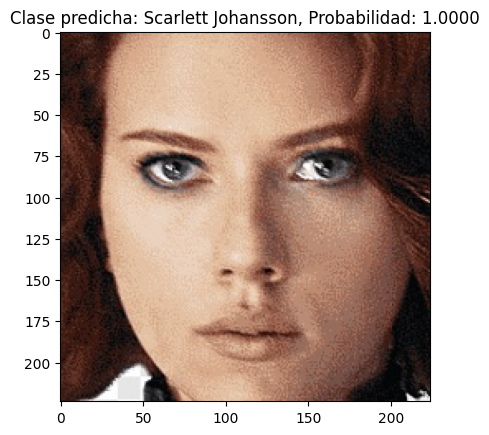

1/1 [==============================] - 0s 21ms/step


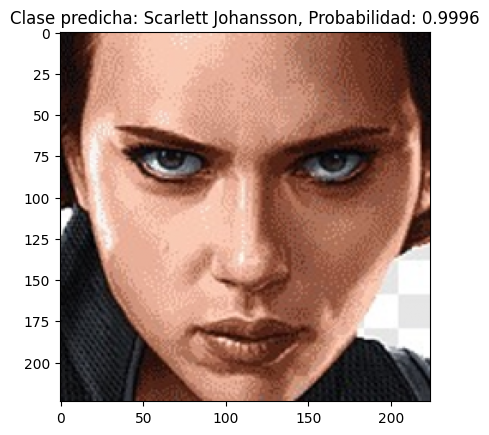

1/1 [==============================] - 0s 19ms/step


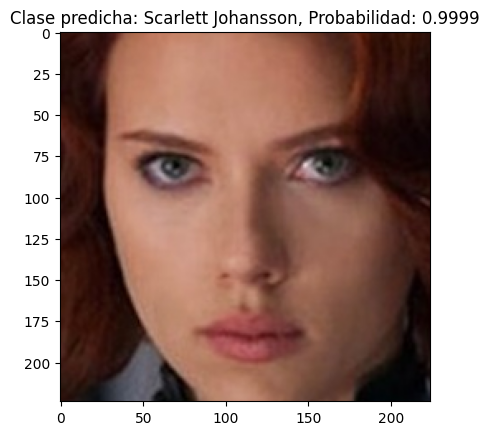

1/1 [==============================] - 0s 19ms/step


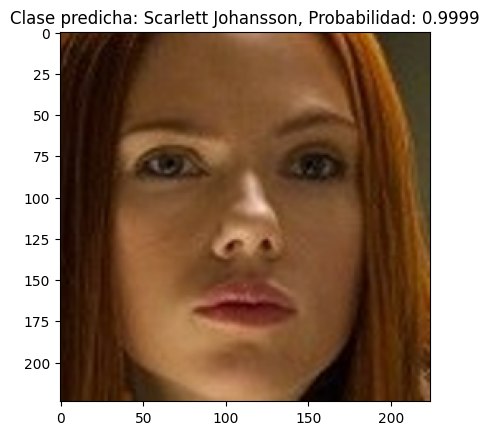

In [29]:
for class_name, images in test_data.items():
    for image_array in images:
        # Utiliza el modelo para clasificar la imagen
        image_array = np.expand_dims(image_array, axis=0)  # Agrega una dimensión adicional para el lote (batch)
        prediction = model.predict(image_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = list(test_data.keys())[predicted_class_index]
        predicted_prob = np.max(prediction)  # Obtiene la probabilidad máxima de la predicción
        plt.imshow(image_array[0])  # Muestra la imagen utilizando Matplotlib
        plt.title(f'Clase predicha: {predicted_class}, Probabilidad: {predicted_prob:.4f}')
        plt.show()